# Linear Regression


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [2]:
white_wine = pd.read_csv('./data/winequality-red.csv', sep=';')

In [24]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
white_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [6]:
y = white_wine['quality']
X = white_wine.drop('quality', axis=1)

In [7]:
X = sm.add_constant(X) # having to rememeber to add in intercept
model = sm.OLS(y, X).fit()

In [8]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Wed, 28 May 2025   Prob (F-statistic):          1.79e-145
Time:                        12:09:17   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 

In [9]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X.columns[1:])
vif

,vif
fixed acidity,7.767512
volatile acidity,1.789390
citric acid,3.128022
residual sugar,1.702588
chlorides,1.481932
free sulfur dioxide,1.963019
total sulfur dioxide,2.186813
density,6.343760
pH,3.329732
sulphates,1.429434


The VIF score for these are not that high. I would watch out for `density` and `fixed acidity`.
That being said, I will now drop based on p-value which those two seem to have high p-values anyways
Considering this, I will drop based on p-value. 
- fixed acidity
- citric acid
- residual sugar
- density

In [10]:
X = white_wine.drop('quality', axis=1)
X = sm.add_constant(X)
X = X.drop(['density','citric acid','fixed acidity','residual sugar'], axis=1)

In [11]:
X.columns

Index(['const', 'volatile acidity', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [12]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X.columns[1:])
vif

,vif
volatile acidity,1.241819
chlorides,1.333333
free sulfur dioxide,1.882706
total sulfur dioxide,1.943920
pH,1.254570
sulphates,1.321931
alcohol,1.220157


In [13]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     127.6
Date:                Wed, 28 May 2025   Prob (F-statistic):          5.32e-149
Time:                        12:09:17   Log-Likelihood:                -1570.5
No. Observations:                1599   AIC:                             3157.
Df Residuals:                    1591   BIC:                             3200.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4301 

In [14]:
preds = model.predict(X)
residuals = y - preds

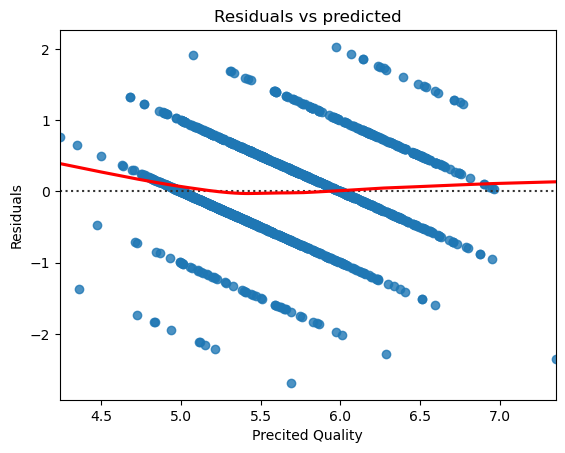

In [15]:
sns.residplot(x=preds, y=residuals, lowess=True, line_kws={'color':'red'})
plt.xlabel('Precited Quality')
plt.ylabel('Residuals')
plt.title('Residuals vs predicted')
plt.show()

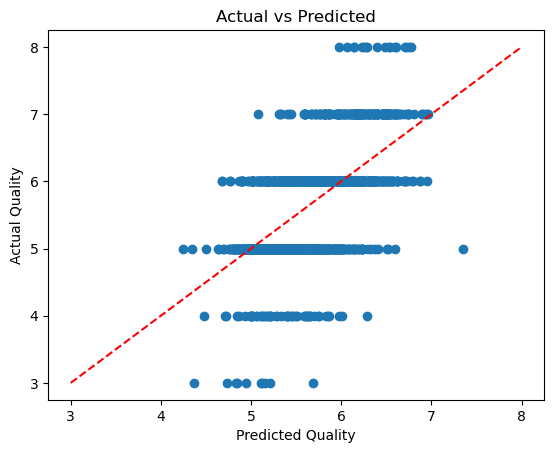

In [17]:
plt.scatter(preds, y)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel("Predicted Quality")
plt.ylabel("Actual Quality")
plt.title("Actual vs Predicted")
plt.show()


From these two plots, we can still see that there are a lot of residuals

In [54]:
features = ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
            'pH', 'sulphates', 'alcohol', 'quality']
test_df = white_wine
test_df['quality'] = test_df['quality'].astype(str)

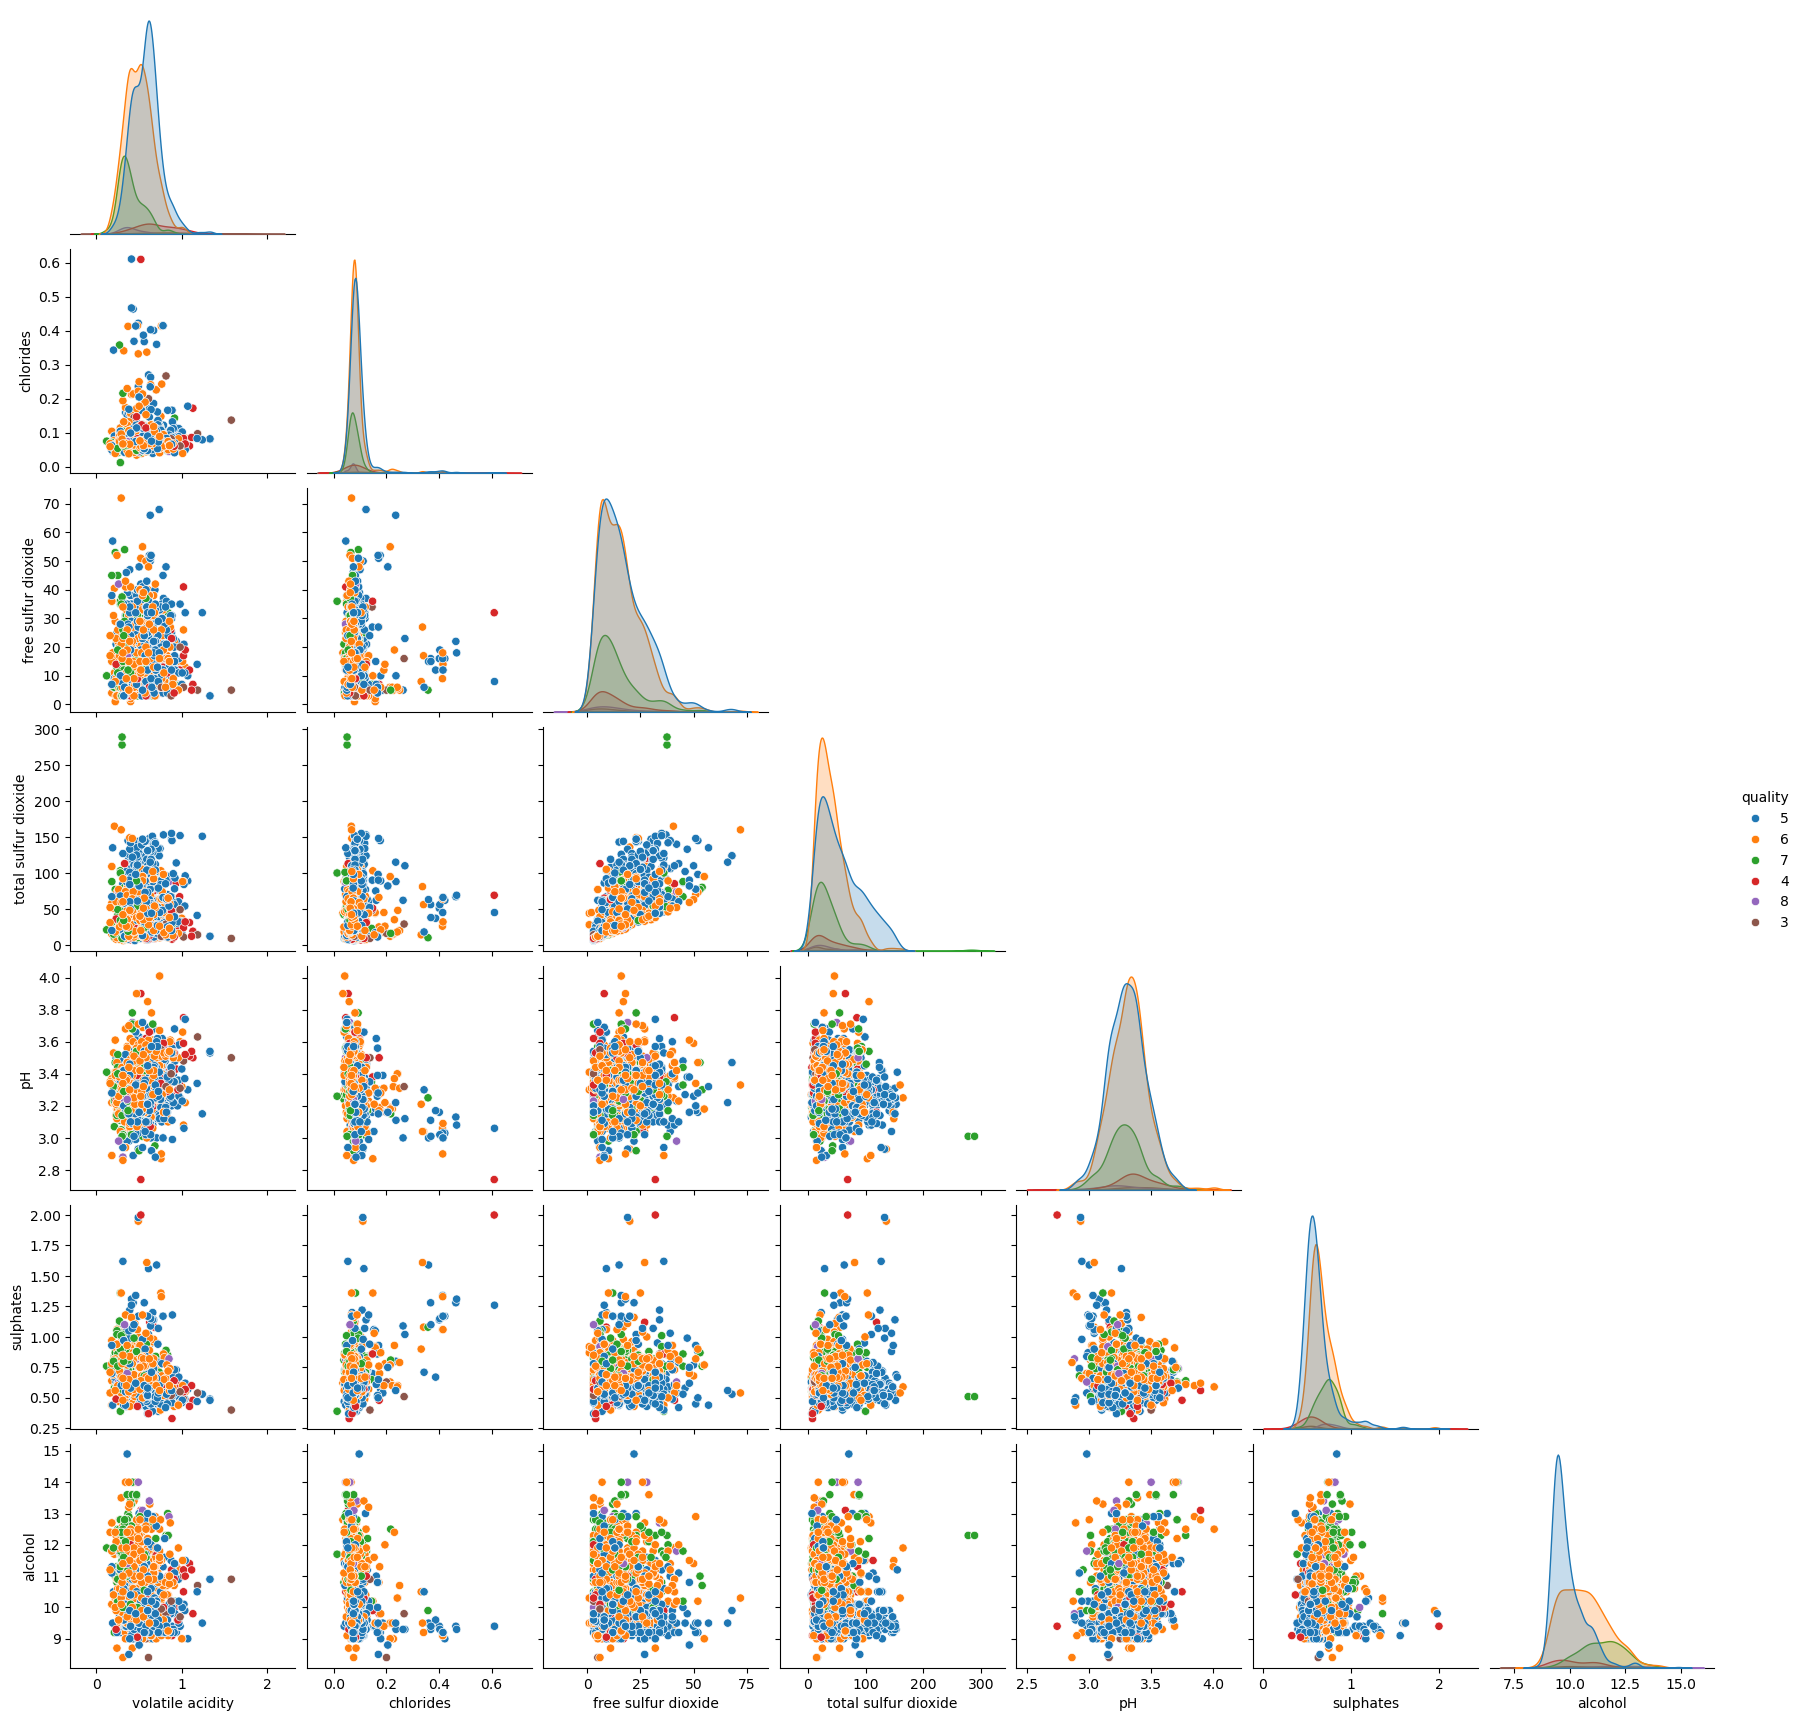

In [60]:
sns.pairplot(test_df[features], hue='quality', corner=True)

## Conclusion

For linear regression in ISLP, it doesnt go much farther after this point so I will end it here.

In this exercise, I was able to:
- Find p-values and use that to reduce the number of features
- Calculate VIF but there was so huge collinearity so I didn't remove anything based on it
- Fit model using OLS
- Make a residual plot
- Make pair plot